# Lab1: Exploring cell types in human and mouse brains

### The brain has thousands of different types of cells. How do we even begin to tease them apart?

We can define neurons by their <b>gene expression patterns</b>, <b>electrophysiology features</b>, and <b>structure</b>. Here, we'll use those three features to compare and contrast cell types in humans and mice.

This notebook will help us investigate specific features in the electrophysiology dataset from the Allen Brain Atlas. See <b>Technical Notes</b> at the end of this notebook for more information about working with the AllenSDK..

### Table of Contents
1. [Step 1. Learn about the dataset through a single experiment](#one)
2. [Step 2. Plotting electrophysiology data](#two)
3. [Step 3. Plotting the morphology of the cell](#three)
4. [Step 4. Analyze computed metrics](#four)
5. [Step 5. Compare waveform shapes](#five)
<hr>

<a id="one"></a>

## Step 1. Learn about the dataset through a single experiment

1. Go to http://celltypes.brain-map.org/. Read through “About Electrophysiology” and “About Morphology”, and answer **Q1** and **Q2** in the Assignment.<br><br>

2. Scroll down to “Download Single Cell Data and Models” and the section “Morphology and Electrophysiology” and click on [Electrophysiology Page](http://celltypes.brain-map.org/experiment/electrophysiology/474626527). This page shows us all of the electrophysiology data for one sample cell that they have recorded from.<br><br>

3. On the top, you’ll see a Mouse Line, Brain Area, and Layer where this cell comes from. The Mouse Line tells us the Cre-driver line that was used — in other words, the cells that they targeted had that gene, and therefore they also expressed Cre-recombinase. Go [here](https://www.ncbi.nlm.nih.gov/gene/) and search for the name of this gene (without -Cre) to answer **Q3**.<br><br>

4. Click through the stimulus sweeps (the colored boxes) to find the first **Long Square** stimulus that elicited an action potential.
    - _Note_: You should notice that the Long Square value is either very close or identical to the rheobase of the cell, as reported on the table on the top. As a reminder, the rheobase is defined as the minimum current needed to elicit an action potential. When the current is below the rheobase, an action potential will never occur regardless of how long the stimulation is.<br><br>
    
5. Use the dropdown menu on the left to change the stimulus type to **Short Square**. Look at how the current injection trace changes – now, it’s a shorter pulse. Note the minimum current needed to elicit an action potential at this stimulus. Use your observations to answer **Q4**.<br><br>
  

<hr>

... as you can probably appreciate at this point, pulling all of this data off of the website manually is rather tedious. If we work directly with the dataset, we can get all of these metrics _and more_. So, let's do that.

<a id="two"></a>
## Step 2. Importing Allen Cell Types data
First, we'll `import` the CellTypesCache module and get the raw data for one sweep.

<div class="alert alert-success"><b>Task</b>: The cell below will grab the data (in the form of a Neuroscience Without Borders, NWB, file) for the same experiment you just looked at on the website. All you need to do is run the cell. This might take a minute or two. You should wait until the circle in the upper right of your Jupyter Notebook is <i>not</i> filled to continue.</div>

*Note*: There's a lot of code here that we're not explaining. You're not expected to know the ins and outs of this. If you're curious, the CellTypesCache that we're importing provides tools to allow us to get information from the cell types database. We're giving it a **manifest** filename as well. CellTypesCache will create this manifest file, which contains metadata about the cache. If you want, you can look under cell_types in your Jupyter directory, and take a look at the file.

*Note 2*: You might get a bunch of "H5pyDeprecationWarning" messages below. This is out of our control and simply a message that something that's being run deep in the code here is going to soon not work. :) 

In [1]:
#Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

#Initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

# Get the electrophysiology (ephys) data for the cell we looked at above
data = ctc.get_ephys_data(474626527)

# Pull out one sweep with some spikes
sweep_data = data.get_sweep(28) 
print('Data retrieved')

Data retrieved


/opt/conda/lib/python3.6/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/opt/conda/lib/python3.6/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/opt/conda/lib/python3.6/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/opt/conda/lib/python3.6/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/opt/conda/lib/python3.6/site-packages/allensdk/core/nwb_data_set.py:135: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  exp_idx_start = 

<a id="three"></a>
## Step 3. Plotting electrophysiology data
Now that you've pulled down some data, chosen a cell, and chosen a sweep number, let's plot the raw data.

First, let's import and rename a few packages that we need to plot our data. If you're curious about working with either of these packages and would like to learn more, check out the DataQuest "Pandas and NumPy Fundamentals" lessons. Otherwise, you can just plug and chug below. :)

<div class="alert alert-success">
    <b>Task</b>: Just like you did in the introductory lesson, import the <a href="https://www.numpy.org/">numpy</a> toolbox nicknamed as <code>np</code>. Add a <code>print</code> message at the end of the cell that says "Packages imported" so that you know the code ran. Print statements look like this: <code>print('message')</code>.</div>

In [2]:
# Import numpy below
import numpy as np

# Import another useful package, called pandas
import pandas as pd

# Import our plotting package
import matplotlib.pyplot as plt

# Specify that all plots will happen inline
%matplotlib inline  

# Print statement below

<a id="four"></a>
## Step 4. Analyze computed metrics

The Cell Types Database contains a set of features that have already been computed, which could serve as good starting points for analysis. We can query the database to get these features. Below, we'll use the Pandas package that we imported above to create a **dataframe** for our data.

<div class="alert alert-success">
    <b>Task</b>: Run the cell below. It'll take ~10 seconds. This should produce a dataframe, which looks something like an excel spreadsheet. You can scroll to the right to see all of the different features available in this dataset.</div>

In [3]:
# Download all electrophysiology features for all cells
ephys_features = ctc.get_ephys_features()
ef_df = pd.DataFrame(ephys_features).set_index('specimen_id')

print("Ephys features available for %d cells:" % len(ef_df))
ef_df.head() # Just show the first 5 rows (the head) of our dataframe 

Ephys features available for 2333 cells:


,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
specimen_id,,,,,,,,,,,,,,,,,,,,,
529878215,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,13.295680,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391
548459652,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,20.650735,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595
579978640,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,2.551960,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321
439024551,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,9.576308,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559
515188639,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,2.490433,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991


This is a lot of possible features. Let's first look at the speed of the trough, and the ratio between the upstroke and downstroke of the action potential.
![](https://github.com/ajuavinett/CellTypesLesson/blob/master/docs/ap_features.png?raw=true)
<div style="background: #F3D48D; border-radius: 3px; padding: 10px;">
<b>Action potential fast trough (fast_trough_v_long_square)</b>: Minimum value of the membrane potential in the interval lasting 5 ms after the peak in response to a long square stimulus.

<b>Upstroke/downstroke ratio (upstroke_downstroke_ratio_long_square)</b>: The ratio between the absolute values of the action potential peak upstroke and the action potential peak downstroke in response to a long square stimulus.</div> 

Above, we created a pandas dataframe of all of these features. Here, we'll assign the columns we're interested to two different variables. These variables now contain all of the datapoints we're interested in. We can access different columns of the dataframe by using the syntax `dataframe['column_of_interest']`.

<div class="alert alert-success">
<b>Task:</b> Run the cell below to store these columns into our two new variables.</div>

In [4]:
fast_trough = ef_df['fast_trough_v_long_square']
upstroke_downstroke = ef_df['upstroke_downstroke_ratio_long_square']

<div class="alert alert-success">
<b>Task:</b> Create a scatterplot that plots the fast trough (x axis) versus the upstroke-downstroke ratio (y axis). Label your axes accordingly. You'll also need this code for <b>Q5</b> on the assignment.

<b>Hint</b>: Make sure you have the toolboxes you need!</div>

In [ ]:
# Your scatterplot here


It looks like there may be roughly two clusters in the data above. Maybe they relate to whether the cells are presumably excitatory (spiny) cells or inhibitory (aspiny) cells. Let's query the API and split up the two sets to see.

<div class="alert alert-success">
<b>Task:</b> The cell below will dig up the dendrite type of these cells and add that to our dataframe. Then, it'll create our same scatterplot, where each dot is colored by dendrite type. All you need to do is run the cell!</div>

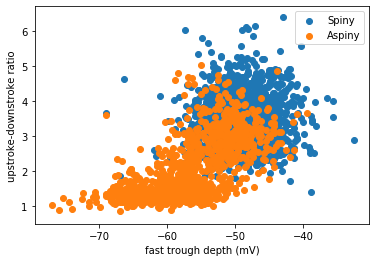

In [5]:
# Get information about our cells' dendrites
cells = ctc.get_cells()
ef_df_dendrites = ef_df.join(pd.DataFrame(cells).set_index('id'))

# Create a dataframe for spiny cells, and a dataframe for aspiny cells
spiny_df = ef_df_dendrites[ef_df_dendrites['dendrite_type'] == 'spiny']
aspiny_df = ef_df_dendrites[ef_df_dendrites['dendrite_type'] == 'aspiny']

# Create our plot! Calling scatter twice like this will draw both of these on the same plot.
plt.scatter(spiny_df['fast_trough_v_long_square'],spiny_df['upstroke_downstroke_ratio_long_square'])
plt.scatter(aspiny_df['fast_trough_v_long_square'],aspiny_df['upstroke_downstroke_ratio_long_square'])

plt.ylabel("upstroke-downstroke ratio")
plt.xlabel("fast trough depth (mV)")
plt.legend(['Spiny','Aspiny'])
    
plt.show()

Looks like these two clusters do partially relate to the dendritic type. Cells with spiny dendrites (which are typically excitatory cells) have a big ratio of upstroke:downstroke, and a more shallow trough (less negative). Cells with aspiny dendrites (typically inhibitory cells) are a little bit more varied. But </i>only</i> aspiny cells have a low upstroke:downstroke ratio and a deeper trough (more negative).

<a id="five"></a>
## Step 5. Compare waveform shapes

Let's take a closer look at the action potentials of these cells to see what these metrics actually mean for the action potential waveform by choosing one of the cells with the highest upstroke:downstroke ratio.

Our first line of code, where it says `ef_df.sort_values()` is the code that will arrange our dataframe by the **upstroke_downstroke_ratio_long_square** column. This first time around, we'll organize it so that the highest ratio is at the top (`ascending=False`). This is an example of a **boolean** in Python. You can change this to say `ascending=True` if you want to sort with *lowest* ratio at the top.

In [20]:
# Sort our dataframe so that it's ascending based on upstroke:downstroke ratio
ef_df_upstroke_sorted = ef_df.sort_values('upstroke_downstroke_ratio_long_square',ascending=False)

# Assign one of the top cells in our dataframe and the ratio to different variables
specimen_id = ef_df_upstroke_sorted.index[2]
ratio = ef_df_upstroke_sorted.iloc[2]['upstroke_downstroke_ratio_long_square']

# Print our results so that we can see them
print('Specimen ID: ' + str(specimen_id) + ' with upstroke-downstroke ratio: ' + str(ratio))

Now we can take a closer look at the action potential for that cell by grabbing its electrophysiology data, just like we did above. Let's find a good sweep that will show us some nice action potentials. The next cell of code will look for sweep numbers with a Long Square stimulus of at least 100 pA. It'll print some sweep IDs.

<div class="alert alert-success"><b>Task:</b> Run the cell below!</div>

In [ ]:
# Get the data for our specimen
upstroke_data = ctc.get_ephys_data(specimen_id)

# Get one sweep for our specimen (I've already handselected a gorgeous one for you, 45)
upstroke_sweep = upstroke_data.get_sweep(45) 

# Get the voltage trace of our data
voltage = upstroke_sweep['response'] * 1e3 # converted to mV!

# Get the time stamps for our voltage trace
timestamps = (np.arange(0, len(voltage)) * (1.0 / upstroke_sweep['sampling_rate']))

And now let's plot our sweep. You may need to change some values in the plotting script to actually zoom in on the action potential, or change the sweep number to one where you can see an action potential.

<div class="alert alert-success"><b>Task</b>: In the cell below, use the <code>plt.plot(x,y)</code> to plot our voltage trace. You will need to give it two arguments, which are variables we created above: timestamps (x) and voltage (y). Without changing the limits on the x-axis, you won't be able to see individual action potentials. Modify the x-axis using <code>plt.xlim([min,max])</code> to specify the limits (replace <code>min</code> and <code>max</code> with numbers that make sense for this x-axis.</div>

<div class="alert alert-success"><b>Task</b> Generate a similar plot for a cell with a <b>low</b> upstroke ratio. Similiar to above, zoom in on the x axis so that you can actually see the shape of the action potential waveform. Be sure to add axis labels that make sense. You will need this code for <b>Q6</b> on the assignment (a1).

<b>Hint</b>: You only need to change <i>one</i> value in all of the code under **Step 5** above in order to make this change. How did we arrange our dataframe at first?
    
  

As you'll hopefully see, even that one metric, upstroke:downstroke ratio, means the shape of the action potential is dramatically different. The other metric we looked at above, size of the trough, is highly correlated with upstroke:downstroke. You can see that by comparing the two cells here. Cells with high upstroke:downstroke tend to have less negative troughs (undershoots) after the action potential.

In a subsequent lab, we'll get out of the action potential weeds a bit and compare mouse and human cells on a few of these metrics.  But that's it for today!

In [ ]:
from IPython.display import HTML
print('Nice work!')
HTML('<img src="https://media.giphy.com/media/xUOwGhOrYP0jP6iAy4/giphy.gif">')

Specimen ID: 569991910 with upstroke-downstroke ratio: 0.906845223777635


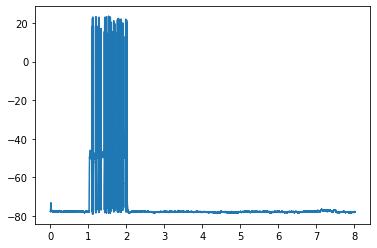

In [22]:
import numpy as np

# Sort our dataframe so that it's ascending based on upstroke:downstroke ratio
ef_df_upstroke_sorted = ef_df.sort_values('upstroke_downstroke_ratio_long_square',ascending=True)

# Assign one of the top cells in our dataframe and the ratio to different variables
specimen_id = ef_df_upstroke_sorted.index[2]
ratio = ef_df_upstroke_sorted.iloc[2]['upstroke_downstroke_ratio_long_square']

# Print our results so that we can see them
print('Specimen ID: ' + str(specimen_id) + ' with upstroke-downstroke ratio: ' + str(ratio))

# Get the data for our specimen
upstroke_data = ctc.get_ephys_data(specimen_id)

# Get one sweep for our specimen (I've already handselected a gorgeous one for you, 45)
upstroke_sweep = upstroke_data.get_sweep(45) 

# Get the voltage trace of our data
voltage = upstroke_sweep['response'] * 1e3 # converted to mV!

# Get the time stamps for our voltage trace
timestamps = (np.arange(0, len(voltage)) * (1.0 / upstroke_sweep['sampling_rate']))

plt.plot(timestamps, voltage)

-----------

#### Technical notes & credits

This notebook demonstrates most of the features of the AllenSDK that help manipulate data in the Cell Types Database.  The main entry point will be through the `CellTypesCache` class. `CellTypesCache` is responsible for downloading Cell Types Database data to a standard directory structure on your hard drive.  If you use this class, you will not have to keep track of where your data lives, other than a root directory.

Much more information can be found in the <a href="http://help.brain-map.org/download/attachments/8323525/CellTypes_Ephys_Overview.pdf">Allen Brain Atlas whitepaper</a> as well as in their <a href="http://alleninstitute.github.io/AllenSDK/cell_types.html">GitHub documentation</a>.

This file modified from <a href='https://alleninstitute.github.io/AllenSDK/_static/examples/nb/cell_types.html'>this</a> notebook.

In case you're curious, <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html ">here's documentation</a> for plotting pandas series (which we do quite a bit above). You can always Google questions you have!)